In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [688]:
xytick_font = 18
xylabel_font = 24
legend_font = 16

In [689]:
data = pd.read_csv('/home/lei/rajrup/KinectStream/data/user_study/user_study_01_05_2024.csv')
data

,Video Sequence,Trace Name,Participant ID,Draco,Starline++,VVStream (ours)
0,Band2,tracep1,1,1.0,3.0,4.0
1,Band2,tracep1,3,1.0,2.5,4.0
2,Band2,wifi25,5,2.5,3.2,4.5
3,Band2,tracep1,6,1.5,2.5,4.2
4,Band2,wifi25,8,1.0,3.0,3.5
...,...,...,...,...,...,...
57,Toddler4,tracep1,13,1.0,3.5,4.0
58,Toddler4,tracep1,15,1.0,4.5,3.5
59,Toddler4,wifi25,16,1.0,2.5,1.7
60,Toddler4,wifi25,18,1.2,2.9,2.7


In [690]:
mean_draco, mean_starline, mean_ours = data["Draco"].mean(), data["Starline++"].mean(), data["VVStream (ours)"].mean()
median_draco, median_starline, median_ours = data["Draco"].median(), data["Starline++"].median(), data["VVStream (ours)"].median()
print(f"Mean Draco = {mean_draco}, Mean Starline = {mean_starline}, Mean VVStream = {mean_ours}")
print(f"Median Draco = {median_draco}, Median Starline = {median_starline}, Median VVStream = {median_ours}")

Mean Draco = 1.3983870967741936, Mean Starline = 3.3169354838709677, Mean VVStream = 3.8209677419354837
Median Draco = 1.15, Median Starline = 3.4, Median VVStream = 4.0


In [691]:
colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)]

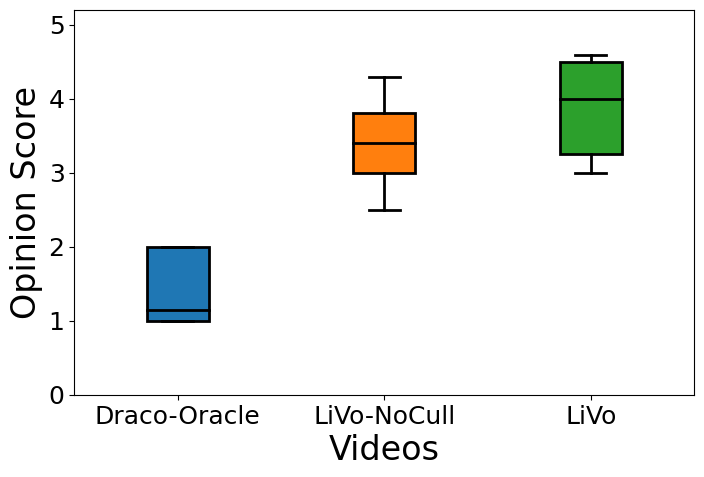

In [692]:
labels = ['Draco', 'Starline++', 'VVStream (Ours)']
y_data = [data['Draco'], data['Starline++'], data['VVStream (ours)']]

boxes = [
    {
        'label': 'Draco',
        'mean': data['Draco'].mean(),
        'med': data['Draco'].median(),
        'q1': data['Draco'].quantile(0.25),
        'q3': data['Draco'].quantile(0.75),
        'whislo': data['Draco'].quantile(0.1),
        'whishi': data['Draco'].quantile(0.9),
        'fliers': [],
    },
    {
        'label': 'LiVo-NoCull',
        'mean': data['Starline++'].mean(),
        'med': data['Starline++'].median(),
        'q1': data['Starline++'].quantile(0.25),
        'q3': data['Starline++'].quantile(0.75),
        'whislo': data['Starline++'].quantile(0.1),
        'whishi': data['Starline++'].quantile(0.9),
        'fliers': [],
    },
    {
        'label': 'LiVo',
        'mean': data['VVStream (ours)'].mean(),
        'med': data['VVStream (ours)'].median(),
        'q1': data['VVStream (ours)'].quantile(0.25),
        'q3': data['VVStream (ours)'].quantile(0.75),
        'whislo': data['VVStream (ours)'].quantile(0.1),
        'whishi': data['VVStream (ours)'].quantile(0.9),
        'fliers': [],
    },
]

fig, ax = plt.subplots(figsize=(8, 5))
boxes_ = ax.bxp(boxes, patch_artist=True)

for k, v in boxes_.items():
    plt.setp(boxes_.get(k), color='k', linewidth=2)

for box, color in zip(boxes_['boxes'], colors):
    box.set(facecolor=color)

ax.set_ylabel('Opinion Score', fontsize=xylabel_font)
ax.set_xlabel('Videos', fontsize=xylabel_font)
ax.set_ylim(0, 5.2)

ax.set_ylabel('Opinion Score', fontsize=xylabel_font)
ax.set_xlabel('Videos', fontsize=xylabel_font)
ax.set_ylim(0, 5.2)
ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticklabels(np.arange(0, 6, 1), fontsize=xytick_font)
ax.set_xticklabels(['Draco-Oracle', 'LiVo-NoCull', 'LiVo'], fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label='Draco')
starline_patch = mpatches.Patch(color=colors[1], label='LiVo-NoCull')
vvstream_patch = mpatches.Patch(color=colors[2], label='LiVo')

# Add legend with rectangle patches
# plt.legend(handles=[draco_patch, starline_patch, vvstream_patch], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=14)
plt.show()

# Save figure to pdf
fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_across_methods.pdf', bbox_inches='tight')

In [693]:
import json
print(json.dumps(boxes, indent=4))

[
    {
        "label": "Draco",
        "mean": 1.3983870967741936,
        "med": 1.15,
        "q1": 1.0,
        "q3": 2.0,
        "whislo": 1.0,
        "whishi": 2.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.3169354838709677,
        "med": 3.4,
        "q1": 3.0,
        "q3": 3.8,
        "whislo": 2.5,
        "whishi": 4.29,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.8209677419354837,
        "med": 4.0,
        "q1": 3.25,
        "q3": 4.5,
        "whislo": 3.0,
        "whishi": 4.59,
        "fliers": []
    }
]


In [694]:
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color='k', linewidth=2)
    
    for box in plot_name['boxes']:
        box.set(facecolor=color_code)


    # # use plot function to draw a small line to name the legend.
    # plt.plot([], c=color_code, label=label)
    # plt.legend(loc='upper center',ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=14)

In [695]:
def create_box(data, label):
    dict_ = {
        'label': label,
        'mean': data.mean(),
        'med': data.median(),
        'q1': data.quantile(0.25),
        'q3': data.quantile(0.75),
        'whislo': data.quantile(0.1),
        'whishi': data.quantile(0.9),
        'fliers': [],
    }
    return dict_

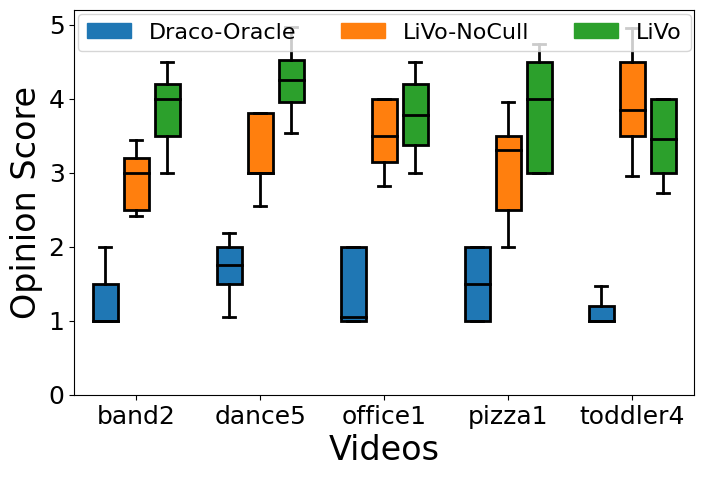

In [696]:
labels = list(data['Video Sequence'].unique())

# # change to lower case
labels_lower = [label.lower() for label in labels]

draco_data = [data[data['Video Sequence'] == label]['Draco'] for label in labels]
starline_data = [data[data['Video Sequence'] == label]['Starline++'] for label in labels]
vvstream_data = [data[data['Video Sequence'] == label]['VVStream (ours)'] for label in labels]

draco_box = [create_box(data, 'Draco') for data in draco_data]
starline_box = [create_box(data, 'LiVo-NoCull') for data in starline_data]
vvstream_box = [create_box(data, 'LiVo') for data in vvstream_data]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
draco_plot = ax.bxp(draco_box, positions=np.array(np.arange(len(draco_data)))*2.0-0.5, widths=0.4, patch_artist=True)
starline_plot = ax.bxp(starline_box, positions=np.array(np.arange(len(starline_data)))*2.0, widths=0.4, patch_artist=True)
vvstream_plot = ax.bxp(vvstream_box, positions=np.array(np.arange(len(vvstream_data)))*2.0+0.5, widths=0.4, patch_artist=True)

# fig, ax = plt.subplots(figsize=(10, 6))
# draco_plot = ax.boxplot(draco_data, positions=np.array(np.arange(len(draco_data)))*2.0-0.5, widths=0.4, showfliers=False)
# starline_plot = plt.boxplot(starline_data, positions=np.array(np.arange(len(starline_data)))*2.0, widths=0.4, showfliers=False)
# vvstream_plot = plt.boxplot(vvstream_data, positions=np.array(np.arange(len(vvstream_data)))*2.0+0.5, widths=0.4, showfliers=False)

define_box_properties(draco_plot, colors[0], 'Draco-Oracle')
define_box_properties(starline_plot, colors[1], 'LiVo-NoCull')
define_box_properties(vvstream_plot, colors[2], 'LiVo')

ax.set_xticks(np.arange(0, len(labels) * 2, 2), labels_lower)

ax.set_ylabel('Opinion Score', fontsize=xylabel_font)
ax.set_xlabel('Videos', fontsize=xylabel_font)
ax.set_ylim(0, 5.2)
ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticklabels(np.arange(0, 6, 1), fontsize=xytick_font)
ax.set_xticklabels(labels_lower, fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label='Draco-Oracle')
starline_patch = mpatches.Patch(color=colors[1], label='LiVo-NoCull')
vvstream_patch = mpatches.Patch(color=colors[2], label='LiVo')

# Add legend with rectangle patches
plt.legend(handles=[draco_patch, starline_patch, vvstream_patch], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_across_videos.pdf', bbox_inches='tight')

In [697]:
print(json.dumps(starline_box, indent=4))
# print(json.dumps(vvstream_box, indent=4))

[
    {
        "label": "LiVo-NoCull",
        "mean": 2.930769230769231,
        "med": 3.0,
        "q1": 2.5,
        "q3": 3.2,
        "whislo": 2.42,
        "whishi": 3.4400000000000004,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.158333333333333,
        "med": 3.0,
        "q1": 3.0,
        "q3": 3.8,
        "whislo": 2.55,
        "whishi": 3.8,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.508333333333333,
        "med": 3.5,
        "q1": 3.1500000000000004,
        "q3": 4.0,
        "whislo": 2.82,
        "whishi": 4.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.119230769230769,
        "med": 3.3,
        "q1": 2.5,
        "q3": 3.5,
        "whislo": 2.0,
        "whishi": 3.95,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.9166666666666665,
        "med": 3.85,
        "q1": 3.5,
        "q3": 4.5,
        "wh

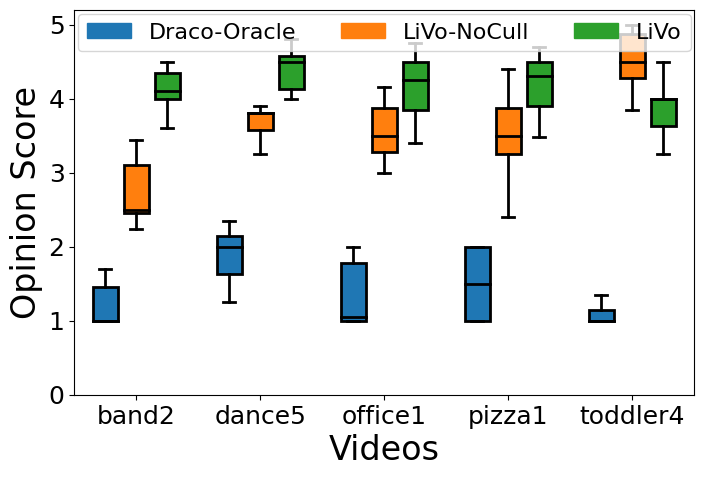

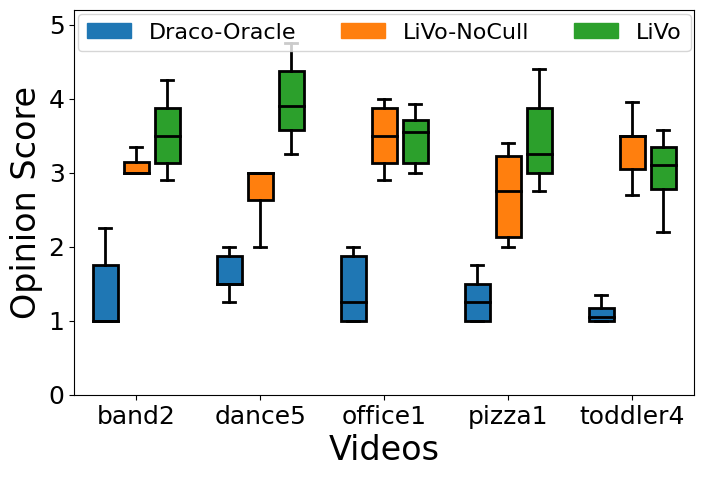

In [698]:
data = pd.read_csv('/home/lei/rajrup/KinectStream/data/user_study/user_study_01_05_2024.csv')


############ TRACEP1 ############
data_tracep1 = data[data['Trace Name'] == 'tracep1']
labels = list(data_tracep1['Video Sequence'].unique())

draco_data_tracep1 = [data_tracep1[data_tracep1['Video Sequence'] == label]['Draco'] for label in labels]
starline_data_tracep1 = [data_tracep1[data_tracep1['Video Sequence'] == label]['Starline++'] for label in labels]
vvstream_data_tracep1 = [data_tracep1[data_tracep1['Video Sequence'] == label]['VVStream (ours)'] for label in labels]

draco_tracep1_box = [create_box(data, 'Draco') for data in draco_data_tracep1]
starline_tracep1_box = [create_box(data, 'LiVo-NoCull') for data in starline_data_tracep1]
vvstream_tracep1_box = [create_box(data, 'LiVo') for data in vvstream_data_tracep1]

fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
draco_plot1 = ax1.bxp(draco_tracep1_box, positions=np.array(np.arange(len(draco_data_tracep1)))*2.0-0.5, widths=0.4, patch_artist=True)
starline_plot1 = ax1.bxp(starline_tracep1_box, positions=np.array(np.arange(len(starline_data_tracep1)))*2.0, widths=0.4, patch_artist=True)
vvstream_plot1 = ax1.bxp(vvstream_tracep1_box, positions=np.array(np.arange(len(vvstream_data_tracep1)))*2.0+0.5, widths=0.4, patch_artist=True)

# fig, ax1 = plt.subplots(figsize=(8, 5))
# draco_plot1 = ax1.boxplot(draco_data_tracep1, positions=np.array(np.arange(len(draco_data_tracep1)))*2.0-0.5, widths=0.4, showfliers=False)
# starline_plot1 = ax1.boxplot(starline_data_tracep1, positions=np.array(np.arange(len(starline_data_tracep1)))*2.0, widths=0.4, showfliers=False)
# vvstream_plot1 = ax1.boxplot(vvstream_data_tracep1, positions=np.array(np.arange(len(vvstream_data_tracep1)))*2.0+0.5, widths=0.4, showfliers=False)

define_box_properties(draco_plot1, colors[0], 'Draco-Oracle')
define_box_properties(starline_plot1, colors[1], 'LiVo-NoCull')
define_box_properties(vvstream_plot1, colors[2], 'LiVo')

ax1.set_xticks(np.arange(0, len(labels) * 2, 2), labels_lower)

ax1.set_ylabel('Opinion Score', fontsize=xylabel_font)
ax1.set_xlabel('Videos', fontsize=xylabel_font)
ax1.set_ylim(0, 5.2)
ax1.set_yticks(np.arange(0, 6, 1))
ax1.set_yticklabels(np.arange(0, 6, 1), fontsize=xytick_font)
ax1.set_xticklabels(labels_lower, fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label='Draco-Oracle')
starline_patch = mpatches.Patch(color=colors[1], label='LiVo-NoCull')
vvstream_patch = mpatches.Patch(color=colors[2], label='LiVo')

# Add legend with rectangle patches
plt.legend(handles=[draco_patch, starline_patch, vvstream_patch], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_across_videos_tracep1.pdf', bbox_inches='tight')


############ WIFI-25 ############
data_wifi25 = data[data['Trace Name'] == 'wifi25']

labels = list(data_wifi25['Video Sequence'].unique())

draco_data_wifi25 = [data_wifi25[data_wifi25['Video Sequence'] == label]['Draco'] for label in labels]
starline_data_wifi25 = [data_wifi25[data_wifi25['Video Sequence'] == label]['Starline++'] for label in labels]
vvstream_data_wifi25 = [data_wifi25[data_wifi25['Video Sequence'] == label]['VVStream (ours)'] for label in labels]

draco_wifi25_box = [create_box(data, 'Draco') for data in draco_data_wifi25]
starline_wifi25_box = [create_box(data, 'LiVo-NoCull') for data in starline_data_wifi25]
vvstream_wifi25_box = [create_box(data, 'LiVo') for data in vvstream_data_wifi25]

fig, ax2 = plt.subplots(figsize=(8, 5))
draco_plot2 = ax2.bxp(draco_wifi25_box, positions=np.array(np.arange(len(draco_data_wifi25)))*2.0-0.5, widths=0.4, patch_artist=True)
starline_plot2 = ax2.bxp(starline_wifi25_box, positions=np.array(np.arange(len(starline_data_wifi25)))*2.0, widths=0.4, patch_artist=True)
vvstream_plot2 = ax2.bxp(vvstream_wifi25_box, positions=np.array(np.arange(len(vvstream_data_wifi25)))*2.0+0.5, widths=0.4, patch_artist=True)

# fig, ax2 = plt.subplots(figsize=(8, 5))
# draco_plot2 = ax2.boxplot(draco_data_wifi25, positions=np.array(np.arange(len(draco_data_wifi25)))*2.0-0.5, widths=0.4, showfliers=False)
# starline_plot2 = ax2.boxplot(starline_data_wifi25, positions=np.array(np.arange(len(starline_data_wifi25)))*2.0, widths=0.4, showfliers=False)
# vvstream_plot2 = ax2.boxplot(vvstream_data_wifi25, positions=np.array(np.arange(len(vvstream_data_wifi25)))*2.0+0.5, widths=0.4, showfliers=False)

define_box_properties(draco_plot2, colors[0], 'Draco-Oracle')
define_box_properties(starline_plot2, colors[1], 'LiVo-NoCull')
define_box_properties(vvstream_plot2, colors[2], 'LiVo')

ax2.set_xticks(np.arange(0, len(labels) * 2, 2), labels_lower)

ax2.set_ylabel('Opinion Score', fontsize=xylabel_font)
ax2.set_xlabel('Videos', fontsize=xylabel_font)
ax2.set_ylim(0, 5.2)
ax2.set_yticks(np.arange(0, 6, 1))
ax2.set_yticklabels(np.arange(0, 6, 1), fontsize=xytick_font)
ax2.set_xticklabels(labels_lower, fontsize=xytick_font)

# Create legend rectangle patches
draco_patch = mpatches.Patch(color=colors[0], label='Draco-Oracle')
starline_patch = mpatches.Patch(color=colors[1], label='LiVo-NoCull')
vvstream_patch = mpatches.Patch(color=colors[2], label='LiVo')

# Add legend with rectangle patches
plt.legend(handles=[draco_patch, starline_patch, vvstream_patch], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()
fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_across_videos_wifi25.pdf', bbox_inches='tight')

In [699]:
print(json.dumps(vvstream_wifi25_box, indent=4))

[
    {
        "label": "LiVo",
        "mean": 3.5500000000000003,
        "med": 3.5,
        "q1": 3.125,
        "q3": 3.875,
        "whislo": 2.9,
        "whishi": 4.25,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.966666666666667,
        "med": 3.9,
        "q1": 3.575,
        "q3": 4.375,
        "whislo": 3.25,
        "whishi": 4.75,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.491666666666667,
        "med": 3.55,
        "q1": 3.125,
        "q3": 3.7125,
        "whislo": 3.0,
        "whishi": 3.925,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 3.466666666666667,
        "med": 3.25,
        "q1": 3.0,
        "q3": 3.875,
        "whislo": 2.75,
        "whishi": 4.4,
        "fliers": []
    },
    {
        "label": "LiVo",
        "mean": 2.9583333333333335,
        "med": 3.1,
        "q1": 2.7750000000000004,
        "q3": 3.35,
        "whislo": 2.2,
        "whishi": 

In [700]:
print(json.dumps(starline_wifi25_box, indent=4))

[
    {
        "label": "LiVo-NoCull",
        "mean": 3.1166666666666667,
        "med": 3.0,
        "q1": 3.0,
        "q3": 3.1500000000000004,
        "whislo": 3.0,
        "whishi": 3.35,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 2.6666666666666665,
        "med": 3.0,
        "q1": 2.625,
        "q3": 3.0,
        "whislo": 2.0,
        "whishi": 3.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.466666666666667,
        "med": 3.5,
        "q1": 3.125,
        "q3": 3.875,
        "whislo": 2.9,
        "whishi": 4.0,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 2.716666666666667,
        "med": 2.75,
        "q1": 2.125,
        "q3": 3.2249999999999996,
        "whislo": 2.0,
        "whishi": 3.4,
        "fliers": []
    },
    {
        "label": "LiVo-NoCull",
        "mean": 3.383333333333333,
        "med": 3.5,
        "q1": 3.05,
        "q3": 3.5,
    

In [701]:
labels

['Band2', 'Dance5', 'Office1', 'Pizza1', 'Toddler4']

In [702]:
draco_data_wifi25

[2     2.5
 4     1.0
 5     2.0
 7     1.0
 9     1.0
 11    1.0
 Name: Draco, dtype: float64,
 13    1.0
 14    1.5
 15    1.5
 16    2.0
 22    1.5
 24    2.0
 Name: Draco, dtype: float64,
 28    2.0
 29    1.5
 30    1.0
 32    2.0
 34    1.0
 36    1.0
 Name: Draco, dtype: float64,
 37    1.0
 38    1.0
 39    2.0
 44    1.5
 45    1.0
 47    1.5
 Name: Draco, dtype: float64,
 50    1.5
 54    1.0
 55    1.0
 56    1.1
 59    1.0
 60    1.2
 Name: Draco, dtype: float64]

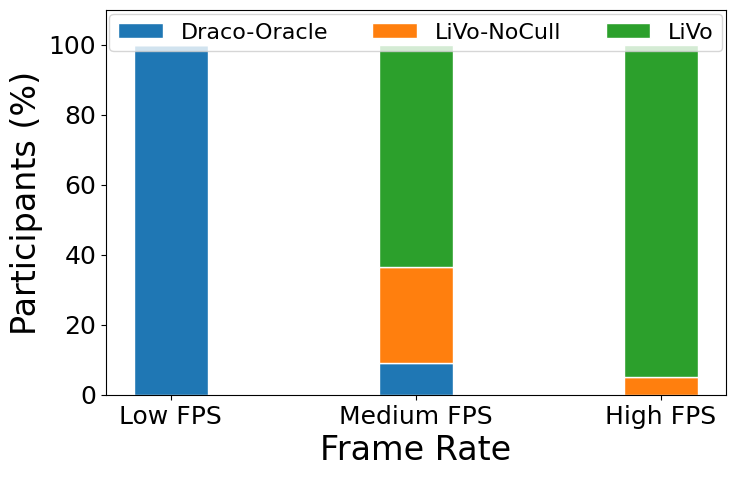

In [703]:
draco_data = {
    "low_fps": 100.0,
    "medium_fps": 0.0,
    "high_fps": 0.0
}

livo_nocull_data = {
    "low_fps": 9.09,
    "medium_fps": 27.27,
    "high_fps": 63.64
}

livo_data = {
    "low_fps": 0.0,
    "medium_fps": 5.0,
    "high_fps": 95.0
}

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(8, 5))

barWidth = 0.3
r = [0, 1, 2]

plt.bar(r, [draco_data["low_fps"], livo_nocull_data["low_fps"], livo_data["low_fps"]], color=colors[0], edgecolor='white', width=barWidth)
plt.bar(r, [draco_data["medium_fps"], livo_nocull_data["medium_fps"], livo_data["medium_fps"]], bottom=[draco_data["low_fps"], livo_nocull_data["low_fps"], livo_data["low_fps"]], color=colors[1], edgecolor='white', width=barWidth)
plt.bar(r, [draco_data["high_fps"], livo_nocull_data["high_fps"], livo_data["high_fps"]], bottom=[draco_data["low_fps"] + draco_data["medium_fps"], livo_nocull_data["low_fps"] + livo_nocull_data["medium_fps"], livo_data["low_fps"] + livo_data["medium_fps"]], color=colors[2], edgecolor='white', width=barWidth)

plt.xticks(r, ['Low FPS', 'Medium FPS', 'High FPS'], fontsize=xytick_font)
plt.ylim(0, 110)
plt.yticks(np.arange(0, 101, 20), fontsize=xytick_font)
plt.ylabel('Participants (%)', fontsize=xylabel_font)
plt.xlabel('Frame Rate', fontsize=xylabel_font)
plt.legend(['Draco-Oracle', 'LiVo-NoCull', 'LiVo'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

# Save figure to pdf
fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_fps_distribution.pdf', bbox_inches='tight')


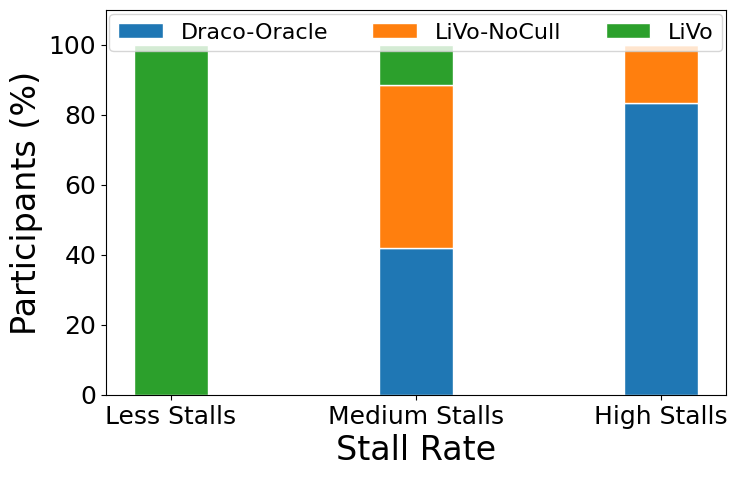

In [704]:
draco_data = {
    "less_stalls" : 0.0,
    "medium_stalls": 0.0,
    "more_stalls": 100.0
}

livo_nocull_data = {
    "less_stalls": 41.86,
    "medium_stalls": 46.51,
    "more_stalls": 11.63
}

livo_data = {
    "less_stalls": 83.33,
    "medium_stalls": 16.67,
    "more_stalls": 0.0
}

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(8, 5))

barWidth = 0.3
r = [0, 1, 2]

plt.bar(r, [draco_data["less_stalls"], livo_nocull_data["less_stalls"], livo_data["less_stalls"]], color=colors[0], edgecolor='white', width=barWidth)
plt.bar(r, [draco_data["medium_stalls"], livo_nocull_data["medium_stalls"], livo_data["medium_stalls"]], bottom=[draco_data["less_stalls"], livo_nocull_data["less_stalls"], livo_data["less_stalls"]], color=colors[1], edgecolor='white', width=barWidth)
plt.bar(r, [draco_data["more_stalls"], livo_nocull_data["more_stalls"], livo_data["more_stalls"]], bottom=[draco_data["less_stalls"] + draco_data["medium_stalls"], livo_nocull_data["less_stalls"] + livo_nocull_data["medium_stalls"], livo_data["less_stalls"] + livo_data["medium_stalls"]], color=colors[2], edgecolor='white', width=barWidth)

plt.xticks(r, ['Less Stalls', 'Medium Stalls', 'High Stalls'], fontsize=xytick_font)
plt.ylim(0, 110)
plt.yticks(np.arange(0, 119, 20), fontsize=xytick_font)
plt.ylabel('Participants (%)', fontsize=xylabel_font)
plt.xlabel('Stall Rate', fontsize=xylabel_font)
plt.legend(['Draco-Oracle', 'LiVo-NoCull', 'LiVo'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

# Save figure to pdf
fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_stall_distribution.pdf', bbox_inches='tight')

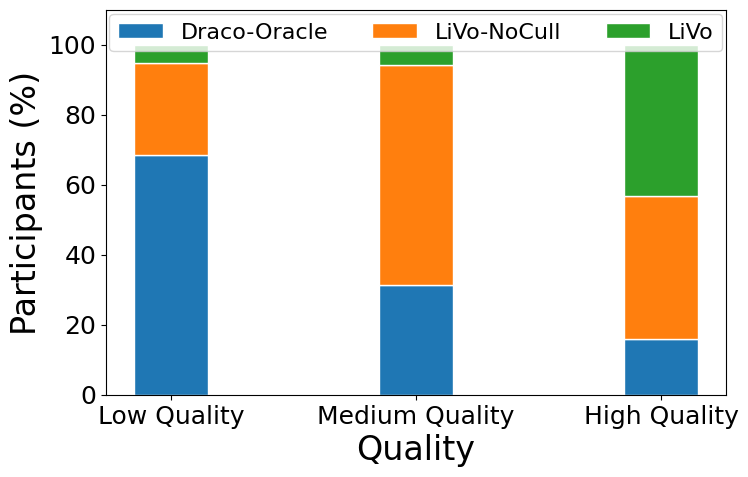

In [705]:
draco_data = {
    "low_quality": 68.42,
    "medium_quality": 26.32,
    "high_quality": 5.26
}

livo_nocull_data = {
    "low_quality": 31.43,
    "medium_quality": 62.86,
    "high_quality": 5.71
}

livo_data = {
    "low_quality": 15.91,
    "medium_quality": 40.91,
    "high_quality": 43.18
}

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(8, 5))

barWidth = 0.3
r = [0, 1, 2]

plt.bar(r, [draco_data["low_quality"], livo_nocull_data["low_quality"], livo_data["low_quality"]], color=colors[0], edgecolor='white', width=barWidth)
plt.bar(r, [draco_data["medium_quality"], livo_nocull_data["medium_quality"], livo_data["medium_quality"]], bottom=[draco_data["low_quality"], livo_nocull_data["low_quality"], livo_data["low_quality"]], color=colors[1], edgecolor='white', width=barWidth)
plt.bar(r, [draco_data["high_quality"], livo_nocull_data["high_quality"], livo_data["high_quality"]], bottom=[draco_data["low_quality"] + draco_data["medium_quality"], livo_nocull_data["low_quality"] + livo_nocull_data["medium_quality"], livo_data["low_quality"] + livo_data["medium_quality"]], color=colors[2], edgecolor='white', width=barWidth)

plt.xticks(r, ['Low Quality', 'Medium Quality', 'High Quality'], fontsize=xytick_font)
plt.ylim(0, 110)
plt.yticks(np.arange(0, 119, 20), fontsize=xytick_font)
plt.ylabel('Participants (%)', fontsize=xylabel_font)
plt.xlabel('Quality', fontsize=xylabel_font)
plt.legend(['Draco-Oracle', 'LiVo-NoCull', 'LiVo'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.019), fontsize=legend_font)
plt.show()

# Save figure to pdf

fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/user_study_quality_distribution.pdf', bbox_inches='tight')